In [1]:
using DataFrames
using Plots
using CategoricalArrays
using Random
using Colors
using Imbalance
using MLUtils

include("./utils.jl")

plot_data

### 1. Generate Random Data

In [2]:
rng = Random.default_rng()

num_rows = 50
num_features = 4
probs = [0.5, 0.2, 0.3]

X, y = generate_imbalanced_data(num_rows, num_features; probs, type="MatrixTable")
Xm = Tables.matrix(X)
# It should work whether X is a matrix or a table

50×4 Matrix{Float64}:
 0.499467   0.0970381   0.907192   0.0856335
 0.423122   0.661575    0.566585   0.220991
 0.071577   0.0551094   0.262415   0.533771
 0.4844     0.391891    0.7123     0.831436
 0.665819   0.882207    0.344643   0.913029
 0.0354036  0.383992    0.456685   0.454175
 0.794218   0.672207    0.0824387  0.852021
 0.536419   0.459362    0.717498   0.820641
 0.818619   0.92606     0.898869   0.888923
 0.125844   0.463998    0.896839   0.162816
 ⋮                                 
 0.427496   0.109689    0.328954   0.981019
 0.421218   0.789835    0.468758   0.56043
 0.556493   0.885875    0.780124   0.441907
 0.69774    0.00751366  0.38752    0.189962
 0.866675   0.0218792   0.36744    0.918777
 0.564705   0.824334    0.409611   0.601224
 0.323405   0.742989    0.356726   0.628079
 0.966605   0.268326    0.684842   0.883366
 0.668084   0.977789    0.735472   0.798609

### 2. Apply SMOTE

In [3]:
Xover, yover = SMOTE(X, y; k=1, ratios=Dict(0=>1.0, 1=> 1.0, 2=>0.8), rng=rng)

(Tables.MatrixTable{LinearAlgebra.Transpose{Float64, Matrix{Float64}}} with 73 rows, 4 columns, and schema:
 :Column1  Float64
 :Column2  Float64
 :Column3  Float64
 :Column4  Float64, CategoricalValue{Int64, UInt32}[2, 2, 0, 1, 1, 0, 2, 2, 1, 0  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### 3. Plot the Results

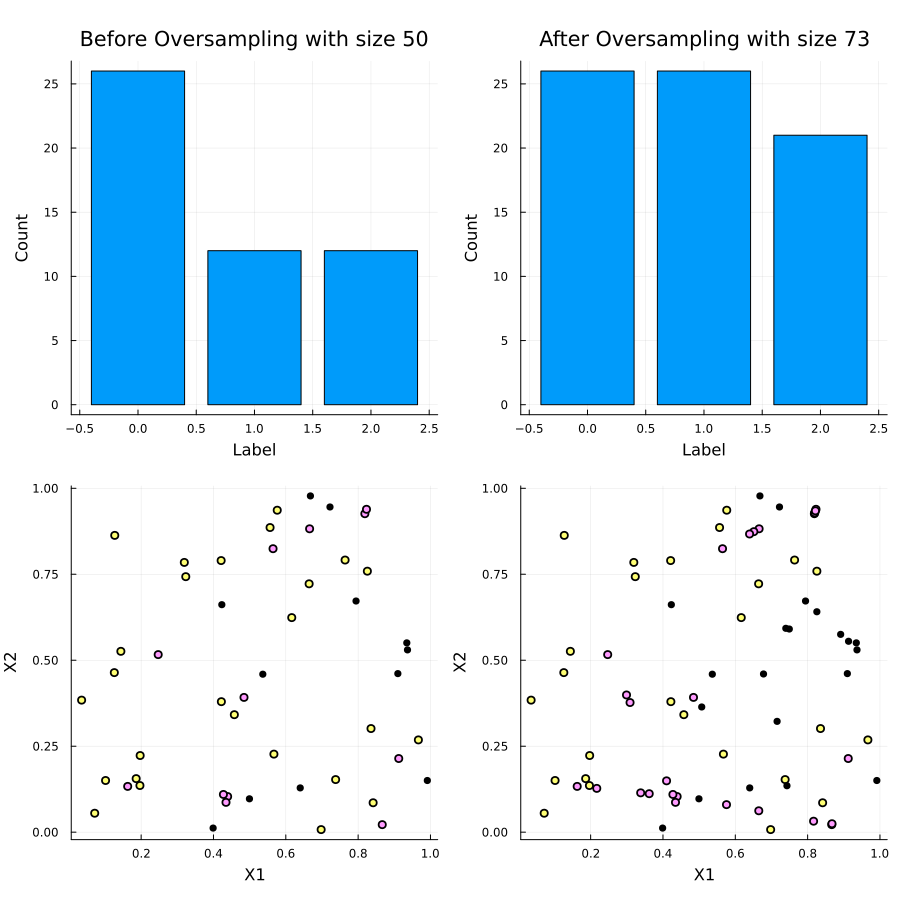

In [4]:
plot_data(y, yover, X, Xover)